# Loading trained and fine tuned model
- We first set path locations

In [0]:
model_path = '/content/data/'
input_path = '/content/data/input/'
output_path = '/content/data/output/'
train_path = input_path + 'train2014/'
test_path = input_path + 'val2014/'

- Then we load the model

In [7]:
import tensorflow.keras as keras
from tensorflow.keras import models 

model = models.load_model(model_path + 'model_full.h5')

Instructions for updating:
Colocations handled automatically by placer.


- We print a summary of the model to show its size and different layers. Note that layer 0 is the Xception pretrained and fine tuned model minus the last fully connected layers

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
batch_normalization_v1_9 (Ba (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                10260     
Total params: 21,922,876
Trainable params: 5,809,172
Non-trainable params: 16,113,704
_________________________________________________________________


- We print a detailed summary of the xception model

In [9]:
model.layers[0].summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

- We define the manually worked out labels and how they are mapped in our trained model

In [0]:
label_names = ['Boat',
               'Snowboard',
               'Skateboard',
               'Baseball bat',
               'Traffic light',
               'Parking meter',
               'Bench',
               'Spoon',
               'Knife',
               'Bottle',
               'Toothbrush',
               'Clock',
               'Sandwich',
               'Carrot',
               'Banana',
               'Toaster',
               'Oven',
               'Bird',
               'Umbrella',
               'Handbag']

model_to_label = [0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2,  3,  4,  5,  6,  7,  8,  9]


- Let's do a test

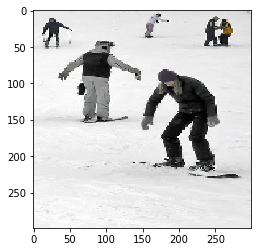

Snowboard 0.9562932
Bench 0.23816723
Handbag 0.038576394
Clock 0.0062237084
Baseball bat 0.0029292405


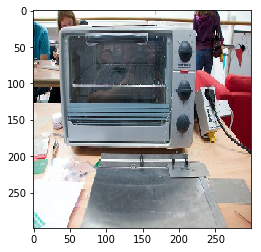

Oven 0.74324954
Spoon 0.14641756
Knife 0.06189111
Bottle 0.052627712
Bench 0.029119015


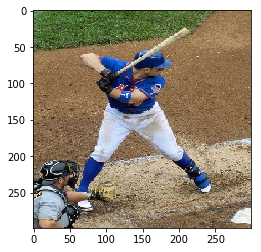

Baseball bat 0.97025037
Bench 0.20333043
Handbag 0.04492736
Oven 0.011443049
Traffic light 0.0059625804


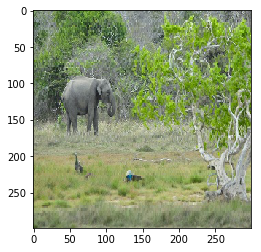

Bird 0.62716216
Boat 0.1695992
Handbag 0.048225313
Carrot 0.027286857
Bottle 0.021645874


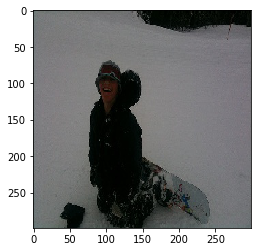

Snowboard 0.9821284
Handbag 0.11420858
Bottle 0.04656467
Bench 0.03666529
Clock 0.013828129


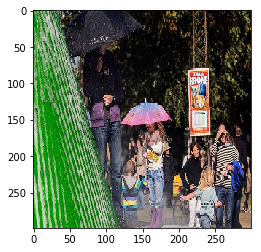

Umbrella 0.9955249
Handbag 0.33646876
Bench 0.07799116
Traffic light 0.02029419
Clock 0.0138834715


In [28]:
test_files = ['1111.jpg', '15515.jpg', '333.jpg', '5678.jpg', '4568.jpg', '14439.jpg']

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

for test_file in test_files:
  image = np.array(Image.open(test_path + test_file).resize((299,299))) / 255
  plt.imshow(image)
  plt.show()
  data = image.reshape((1,299,299,3))
  result  = model.predict(data)
  sorted_results = np.argsort(result[0])[-5:]
  for i  in reversed(sorted_results):
    print(label_names[model_to_label[i]], result[0][i])

- Now predict all test labels in batches of 36 images.

In [15]:
y_pred = {}
y_pred['file'] = []
y_pred['label'] = []
counter = 0
for i in range(431):
  if i % 50 == 0:
    print(i)
  data = np.zeros((36, 299, 299, 3))
  for j in range(36):
    file_name = str(counter) + '.jpg'
    image = np.array(Image.open(test_path + file_name).resize((299,299))) / 255
    data[j] = image.reshape((1,299,299,3))    
    y_pred['file'].append(file_name)    
    counter += 1
  result  = model.predict(data)
  predictions = np.argmax(result, axis=1)
  for prediction in predictions:
    y_pred['label'].append(model_to_label[prediction])

0
50
100
150
200
250
300
350
400


In [0]:
with open(output_path + 'Predicted_labels.txt', 'w') as y_pred_file:
  for file_name, y_pred_ in zip(y_pred['file'], y_pred['label']):
    y_pred_file.write(str(file_name + '\t' + str(y_pred_)+'\n'))